# Analysis
* Observed Trend 1: Cities that are in a lower latitude are currently warmer than cities that are in a higher latitude. This correlates with the fact that cities above the equator are in the winter season and cities below it are in the summer season.
* Observed Trend 2: Currently, the wind speeds in cities above the equator are more likely to be higher than cities in the lower hemisphere.
* Observed Trend 3: Cloudiness is more scattered across the cities regardless if where they are in latitude.

In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import random
import gzip
import json
import requests
import time

In [2]:
# API Key
from config import (api_key)

# Generate Cities List

In [3]:
# Import Json Data of all Cities from api.openweathermap.org 
jsonfilename="data/city.list.json.gz"
with gzip.GzipFile(jsonfilename, 'r') as data:  
    json_bytes = data.read()                      
    json_str = json_bytes.decode('utf-8')            
    city_json_data = json.loads(json_str) 

In [4]:
# Use lists for data 
city_id=[city_json_data[city]['id'] for city in range(len(city_json_data))]
city_name=[city_json_data[city]['name'] for city in range(len(city_json_data))]
city_country=[city_json_data[city]['country'] for city in range(len(city_json_data))]
city_cord_lat=[city_json_data[city]['coord']['lat'] for city in range(len(city_json_data))]
city_cord_lon=[city_json_data[city]['coord']['lon'] for city in range(len(city_json_data))]

In [5]:
# Make data frame
city_data = pd.DataFrame(
    {'id': city_id,
     'name': city_name,
     'country': city_country,
     'lat': city_cord_lat,
     'lng' : city_cord_lon
    })
city_data.head()

,country,id,lat,lng,name
0,UA,707860,44.549999,34.283333,Hurzuf
1,RU,519188,55.683334,37.666668,Novinki
2,NP,1283378,28.000000,84.633331,Gorkhā
3,IN,1270260,29.000000,76.000000,State of Haryāna
4,UA,708546,44.599998,33.900002,Holubynka


In [6]:
# Select 500 random cities
random_cities = city_data.sample(n=500)
random_cities.head()

,country,id,lat,lng,name
147097,ES,3125529,40.437080,-0.851500,Cedrillas
90834,BR,3471840,-15.897500,-52.250832,Aragarcas
40689,AU,2069358,-35.500000,138.449997,Inman Valley
200468,US,4710697,30.917669,-99.786461,Menard
104176,SY,166365,32.890442,36.039902,Nawa


# Perform API Calls

In [7]:
# Set-up lists to collect data and make API call

#Counter
city_count = 1

# Create blank columns for fields
random_cities["Temperature"] = ""
random_cities["Humidity"] = ""
random_cities["Cloudiness"] = ""
random_cities["Wind Speed"] = ""

# Loop through and obtain the weather data using the Open Weather API.
for index, row in random_cities.iterrows():
    # Use time function to keep API call within limits 
    time.sleep(2)
    
    # Open url and use Imperial for (F)
    url = "https://api.openweathermap.org/data/2.5/weather?"
    units = "Imperial"   
    query_url = url + "lat="+ str(row["lat"]) + "&lon=" + str(row["lng"]) + "&appid=" + api_key + "&units=" + units
    
    # Print records log
    print("Processing Record #" + str(city_count)) 
    print(query_url)
    city_count += 1
    
    # Requests to obtain JSON data from Open Weather
    city_weather = requests.get(query_url).json()
     
    #Append the weather data to the appropriate columns.
    #Create debug statement.
    try:
        temperature = city_weather["main"]["temp"]
        humidity = city_weather["main"]["humidity"]
        cloudiness = city_weather["clouds"]["all"]
        wind_speed = city_weather["wind"]["speed"]
        
        random_cities.set_value(index, "Temperature", temperature)
        random_cities.set_value(index,"Humidity", humidity)
        random_cities.set_value(index,"Cloudiness", cloudiness)
        random_cities.set_value(index,"Wind Speed", wind_speed)
    except:
        print("Error, skipping city.")

Processing Record #1
https://api.openweathermap.org/data/2.5/weather?lat=40.43708&lon=-0.8515&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #2
https://api.openweathermap.org/data/2.5/weather?lat=-15.8975&lon=-52.250832&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #3
https://api.openweathermap.org/data/2.5/weather?lat=-35.5&lon=138.449997&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #4
https://api.openweathermap.org/data/2.5/weather?lat=30.917669&lon=-99.786461&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #5
https://api.openweathermap.org/data/2.5/weather?lat=32.890442&lon=36.039902&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #6
https://api.openweathermap.org/data/2.5/weather?lat=49.986141&lon=1.55624&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #7
https://api.openweathermap.org/data/2.5/weather?lat=52.416672&lon=8.71667&appid=

Processing Record #56
https://api.openweathermap.org/data/2.5/weather?lat=41.683609&lon=21.144171&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #57
https://api.openweathermap.org/data/2.5/weather?lat=51.187832&lon=7.7465&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #58
https://api.openweathermap.org/data/2.5/weather?lat=49.472252&lon=3.00939&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #59
https://api.openweathermap.org/data/2.5/weather?lat=51.049999&lon=7.5&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #60
https://api.openweathermap.org/data/2.5/weather?lat=52.98333&lon=6.55&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #61
https://api.openweathermap.org/data/2.5/weather?lat=50.616699&lon=11.85&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #62
https://api.openweathermap.org/data/2.5/weather?lat=51.671089&lon=-1.28278&appid=bcb6f6

Processing Record #111
https://api.openweathermap.org/data/2.5/weather?lat=48.60767&lon=-2.1503&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #112
https://api.openweathermap.org/data/2.5/weather?lat=46.754509&lon=33.34864&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #113
https://api.openweathermap.org/data/2.5/weather?lat=-2.46397&lon=29.573891&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #114
https://api.openweathermap.org/data/2.5/weather?lat=-8.6562&lon=120.594101&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #115
https://api.openweathermap.org/data/2.5/weather?lat=51.32967&lon=8.0071&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #116
https://api.openweathermap.org/data/2.5/weather?lat=13.7351&lon=124.1064&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #117
https://api.openweathermap.org/data/2.5/weather?lat=40.060841&lon=-95.60

Processing Record #166
https://api.openweathermap.org/data/2.5/weather?lat=58.363049&lon=11.25938&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #167
https://api.openweathermap.org/data/2.5/weather?lat=45.376667&lon=38.451668&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #168
https://api.openweathermap.org/data/2.5/weather?lat=45.542469&lon=8.47973&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #169
https://api.openweathermap.org/data/2.5/weather?lat=49.1222&lon=-0.91925&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #170
https://api.openweathermap.org/data/2.5/weather?lat=66.383331&lon=23.66667&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #171
https://api.openweathermap.org/data/2.5/weather?lat=50.0667&lon=6.48333&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #172
https://api.openweathermap.org/data/2.5/weather?lat=53.80267&lon=9.236

Processing Record #221
https://api.openweathermap.org/data/2.5/weather?lat=47.200001&lon=14.68333&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #222
https://api.openweathermap.org/data/2.5/weather?lat=57.387222&lon=41.3675&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #223
https://api.openweathermap.org/data/2.5/weather?lat=45.933331&lon=2.58333&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #224
https://api.openweathermap.org/data/2.5/weather?lat=42.23011&lon=2.82048&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #225
https://api.openweathermap.org/data/2.5/weather?lat=20.549999&lon=-102.51667&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #226
https://api.openweathermap.org/data/2.5/weather?lat=17.162609&lon=102.572723&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #227
https://api.openweathermap.org/data/2.5/weather?lat=51.683331&lon

Processing Record #275
https://api.openweathermap.org/data/2.5/weather?lat=-33.049999&lon=135.466675&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #276
https://api.openweathermap.org/data/2.5/weather?lat=35.613468&lon=110.958542&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #277
https://api.openweathermap.org/data/2.5/weather?lat=11.41667&lon=-3.41667&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #278
https://api.openweathermap.org/data/2.5/weather?lat=-7.2174&lon=108.830101&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #279
https://api.openweathermap.org/data/2.5/weather?lat=-30.35&lon=117.116669&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #280
https://api.openweathermap.org/data/2.5/weather?lat=33.88306&lon=-4.1862&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #281
https://api.openweathermap.org/data/2.5/weather?lat=25.73333&lon

Processing Record #330
https://api.openweathermap.org/data/2.5/weather?lat=34.446499&lon=-82.39151&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #331
https://api.openweathermap.org/data/2.5/weather?lat=42.50214&lon=13.7828&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #332
https://api.openweathermap.org/data/2.5/weather?lat=42.095039&lon=-83.189651&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #333
https://api.openweathermap.org/data/2.5/weather?lat=54.5667&lon=13.4833&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #334
https://api.openweathermap.org/data/2.5/weather?lat=39.027569&lon=-83.919647&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #335
https://api.openweathermap.org/data/2.5/weather?lat=49.612782&lon=11.13222&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #336
https://api.openweathermap.org/data/2.5/weather?lat=26.91111&lon=

Processing Record #384
https://api.openweathermap.org/data/2.5/weather?lat=52.417549&lon=0.52211&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #385
https://api.openweathermap.org/data/2.5/weather?lat=47.024288&lon=10.66853&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #386
https://api.openweathermap.org/data/2.5/weather?lat=52.21965&lon=21.680321&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #387
https://api.openweathermap.org/data/2.5/weather?lat=31.174509&lon=121.11692&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #388
https://api.openweathermap.org/data/2.5/weather?lat=31.250441&lon=-99.25061&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #389
https://api.openweathermap.org/data/2.5/weather?lat=-8.8932&lon=121.161598&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #390
https://api.openweathermap.org/data/2.5/weather?lat=53.6833&lon=

Processing Record #438
https://api.openweathermap.org/data/2.5/weather?lat=47.3237&lon=10.15463&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #439
https://api.openweathermap.org/data/2.5/weather?lat=59.48333&lon=24.9&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #440
https://api.openweathermap.org/data/2.5/weather?lat=42.799999&lon=27.450001&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #441
https://api.openweathermap.org/data/2.5/weather?lat=43.383331&lon=-0.01667&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #442
https://api.openweathermap.org/data/2.5/weather?lat=42.816368&lon=-1.74786&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #443
https://api.openweathermap.org/data/2.5/weather?lat=48.01667&lon=11.2&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #444
https://api.openweathermap.org/data/2.5/weather?lat=-7.70611&lon=-38.154442&

Processing Record #492
https://api.openweathermap.org/data/2.5/weather?lat=45.08469&lon=-93.009941&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #493
https://api.openweathermap.org/data/2.5/weather?lat=44.079521&lon=-69.485046&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #494
https://api.openweathermap.org/data/2.5/weather?lat=45.666672&lon=-0.91667&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #495
https://api.openweathermap.org/data/2.5/weather?lat=71.984093&lon=-125.2463&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #496
https://api.openweathermap.org/data/2.5/weather?lat=54.038761&lon=43.91386&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #497
https://api.openweathermap.org/data/2.5/weather?lat=9.98333&lon=77.633331&appid=bcb6f6f1972448a5eadc67a4307786a6&units=Imperial
Processing Record #498
https://api.openweathermap.org/data/2.5/weather?lat=44.198971&

In [8]:
random_cities.head()

,country,id,lat,lng,name,Temperature,Humidity,Cloudiness,Wind Speed
147097,ES,3125529,40.437080,-0.851500,Cedrillas,44.6,75,0,5.82
90834,BR,3471840,-15.897500,-52.250832,Aragarcas,74.21,86,68,2.55
40689,AU,2069358,-35.500000,138.449997,Inman Valley,86,27,0,6.93
200468,US,4710697,30.917669,-99.786461,Menard,50.97,34,90,4.7
104176,SY,166365,32.890442,36.039902,Nawa,50,76,0,4.7


In [9]:
random_cities.to_csv("random_cities.csv", index=False)

# Latitude vs Temperature Plot

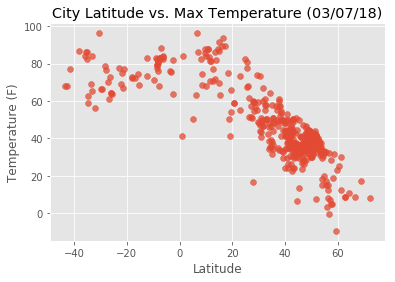

In [11]:
# Create scatter plot for Latitude vs Temperature
plt.scatter(random_cities["lat"],random_cities["Temperature"], alpha = 0.75)
plt.title("City Latitude vs. Max Temperature (03/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')
plt.savefig("Latitude_Temperature_Plot.png")
plt.show()

# Latitude vs. Humidity Plot

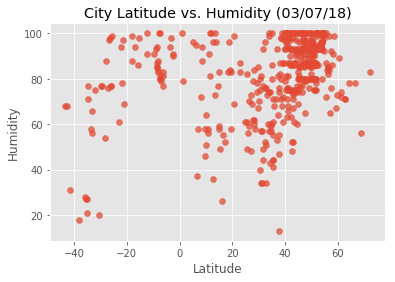

In [12]:
# Create scatter plot for Latitude vs Humidity
plt.scatter(random_cities["lat"],random_cities["Humidity"], alpha = 0.75)
plt.title("City Latitude vs. Humidity (03/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')
plt.savefig("Latitude_Humidity_Plot.png")
plt.show()

# Latitude vs. Cloudiness Plot

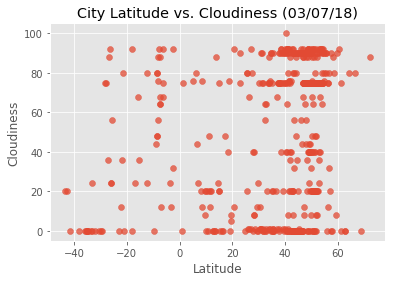

In [13]:
# Create scatter plot for Latitude vs Cloudiness
plt.scatter(random_cities["lat"],random_cities["Cloudiness"], alpha = 0.75)
plt.title("City Latitude vs. Cloudiness (03/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')
plt.savefig("Latitude_Cloudiness_Plot.png")
plt.show()

# Latitude vs. Wind Speed Plot

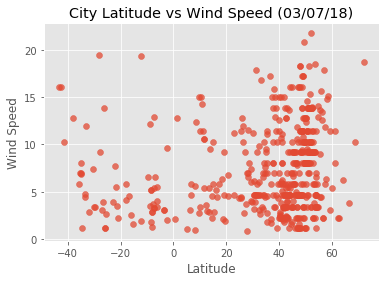

In [14]:
# Create scatter plot for Latitude vs Wind Speed
plt.scatter(random_cities["lat"],random_cities["Wind Speed"], alpha= 0.75)
plt.title("City Latitude vs Wind Speed (03/07/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(b=True, which='major', color='1', alpha =1, linestyle='-')
plt.style.use('ggplot')
plt.savefig("Latitude_WindSpeed_Plot.png")
plt.show()